In [2]:
pip install torch torchvision matplotlib jupyterlab

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Nirvan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import os 
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transforms
tf = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Set data paths
train_path = r"C:\Users\Nirvan\Desktop\Machine_Learning\brain-tumor-mri-dataset\Training"
test_path = r"C:\Users\Nirvan\Desktop\Machine_Learning\brain-tumor-mri-dataset\Testing"

# Ensure paths exist
assert os.path.exists(train_path), f"Train path not found: {train_path}"
assert os.path.exists(test_path), f"Test path not found: {test_path}"

# Create DataLoaders
train_dl = DataLoader(
    datasets.ImageFolder(train_path, transform=tf),
    batch_size=32, shuffle=True, pin_memory=True
)

test_dl = DataLoader(
    datasets.ImageFolder(test_path, transform=tf),
    batch_size=32, shuffle=False, pin_memory=True
)


In [4]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Nirvan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
dataset=od.download('https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset')

Skipping, found downloaded files in ".\brain-tumor-mri-dataset" (use force=True to force download)


In [6]:
os.listdir('brain-tumor-mri-dataset')

['Testing', 'Training']

In [7]:
model = nn.Sequential(
    nn.Conv2d(3, 32, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(32, 64, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(64, 128, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256, 4)  # 4 classes
).to(device)

In [8]:
opt=optim.AdamW(model.parameters(),1e-4)
loss_fn=nn.CrossEntropyLoss()

In [9]:
model.train()
for epoch in range(25):
    running_loss = 0.0
    for x, y in train_dl:
        x, y = x.to(device), y.to(device)  # Move to GPU/CPU

        opt.zero_grad()
        outputs = model(x)                 # Forward pass
        loss = loss_fn(outputs, y)         # Compute loss

        loss.backward()                    # Backpropagation
        opt.step()                         # Optimizer step

        running_loss += loss.item()        # Accumulate scalar loss

    print(f"Epoch {epoch + 1}: Loss was {running_loss:.4f}")


Epoch 1: Loss was 153.7956
Epoch 2: Loss was 101.1725
Epoch 3: Loss was 87.1795
Epoch 4: Loss was 74.9881
Epoch 5: Loss was 67.0210
Epoch 6: Loss was 59.8270
Epoch 7: Loss was 54.1190
Epoch 8: Loss was 48.3864
Epoch 9: Loss was 43.4606
Epoch 10: Loss was 39.1335
Epoch 11: Loss was 34.9987
Epoch 12: Loss was 32.5723
Epoch 13: Loss was 27.5811
Epoch 14: Loss was 25.7696
Epoch 15: Loss was 23.5730
Epoch 16: Loss was 19.5177
Epoch 17: Loss was 18.6577
Epoch 18: Loss was 17.2741
Epoch 19: Loss was 15.2296
Epoch 20: Loss was 13.8083
Epoch 21: Loss was 13.1598
Epoch 22: Loss was 12.8415
Epoch 23: Loss was 10.4568
Epoch 24: Loss was 9.0912
Epoch 25: Loss was 7.7672


In [10]:
model.eval()
test_loss, correct = 0.0, 0

with torch.no_grad():
    for x, y in test_dl:
        x, y = x.to(device), y.to(device)

        logits = model(x)
        test_loss += loss_fn(logits, y).item() * y.size(0)

        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()

test_loss /= len(test_dl.dataset)
accuracy = 100.0 * correct / len(test_dl.dataset)

print('Test Loss:', test_loss, 'Test accuracy', accuracy, '')


Test Loss: 0.11597577843615824 Test accuracy 96.26239511823036 


Predicted class: notumor
Ground-truth: notumor


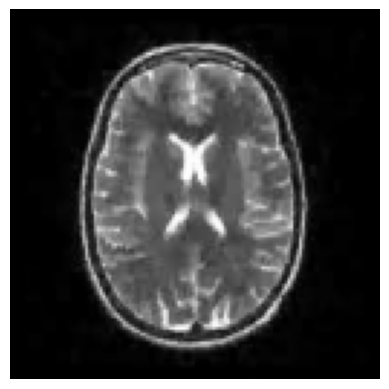

In [27]:
import random 
from torchvision.transforms.functional import to_pil_image
model.eval()

idx=random.randrange(len(test_dl.dataset))
img,label=test_dl.dataset[idx]
unnorm=img*0.5+0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.show

with torch.no_grad():
    logits = model(img.unsqueeze(0).to(device))
    pred = logits.argmax(1).item()

class_names = test_dl.dataset.classes
print(f"Predicted class: {class_names[pred]}")
print(f"Ground-truth: {class_names[label]}")

    

In [28]:
--git commit


SyntaxError: invalid syntax (1425633334.py, line 1)